## Import Packages

In [19]:
import speech_recognition as sr
import whisper

import jiwer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Utilize the speech_recognition package and apply google API

In [5]:
r = sr.Recognizer()
audio = sr.AudioFile('/Users/miaonodera/Desktop/kolhberg_research/audio.flac')
with audio as source:
    audio = r.record(source)
type(audio)

speech_recognition.audio.AudioData

In [6]:
google_text = r.recognize_google(audio)

In [8]:
google_text

"ladies and gentlemen of the jury today we are here to uncover the truth about the theft of the Priceless painting the dawn of Eve we will demonstrate Beyond a reasonable doubt that the defendant Jordan Blake orchestrated this elaborate theft thank you Sam however the truth is my client Jordan Blake has been wrongfully accused based on circumstantial evidence there is no concrete proof linking Jordan to the crime scene in fact we have Alibi witness and digital evidence that the place Jordan Miles Away at the time of the test Taylor the argument my song called the evidence surveillance video from the night of the theft clearly shows the figure resembling Georgia period it's entirely plausible that the real Thief used Jordan's phone to throw off the investigation was discovered in a storage unit rented under Jordan's name how could not be involved the storage unit contract was forged someone else used Jordans identity to rent that unit we have handwriting analysis from a forensic expert 

## Utilize the whisper package and apply whisper API by OpenAI

In [1]:
model = whisper.load_model("base")
result = model.transcribe("/Users/miaonodera/Desktop/kolhberg_research/audio.mp3")
print(f' The text in video: \n {result["text"]}')
transcribed_text = result["text"]

/Users/miaonodera/opt/anaconda3/lib/python3.9/site-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


 The text in video: 
  Ladies and gentlemen of the jury today we are here to uncover the truth about the left of the priceless painting the dawn of Eve We will demonstrate beyond a reasonable doubt that the defendant Jordan Blake orchestrated this elaborate theft Thank you Sam. However, the truth is my client Jordan Blake has been wrongfully accused based on circumstantial evidence There is no concrete proof linking Jordan to the crime scene In fact, we have alibi witness and digital evidence that the police Jordan miles away at the time of the theft Taylor the argument might sound convincing out first However, let's examine the evidence Surveillance video from the night of the theft clearly shows the figure resembling Jordan entering the museum Furthermore five fiveers found on a broken window. Mashla gloves found in Jordan's car Sam as you know appearance can be deceiving The figure in the video is obscured and unidentifiable Regarding the fibers. It's a common type of glove sold in 

## Convert to text file to allow for consistent spacing and indentation

In [9]:
output_file_path = '/Users/miaonodera/Desktop/kolhberg_research/google-api.txt'
with open(output_file_path, "w") as output_file:
    output_file.write(google_text)

In [7]:
output_file_path = '/Users/miaonodera/Desktop/kolhberg_research/whisper-api.txt'
with open(output_file_path, "w") as output_file:
    output_file.write(transcribed_text)

In [15]:
def read_text_file(file_path):
    with open(file_path, 'r') as file:
        return file.read().lower()

google_api = '/Users/miaonodera/Desktop/kolhberg_research/google-api.txt'  # Replace with your reference file path
whisper_api = '/Users/miaonodera/Desktop/kolhberg_research/whisper-api.txt'  # Replace with your hypothesis file path
real_trans = '/Users/miaonodera/Desktop/kolhberg_research/real_trans.txt'  # Replace with your hypot

reference_text = read_text_file(real_trans)
google_text = read_text_file(google_api)
whisper_text = read_text_file(whisper_api)

## Identify the WER and plot differences

In [16]:
error1 = jiwer.wer(reference_text, google_text)
print(f"Word Error Rate for google api: {error1:.2%}")

error2 = jiwer.wer(reference_text, whisper_text)
print(f"Word Error Rate for whisper api: {error2:.2%}")

Word Error Rate for google api: 43.61%
Word Error Rate for whisper api: 19.92%


In [29]:
google_scores

[0.4360587002096436, 0.43243243243243246, 0.5457985958753839]

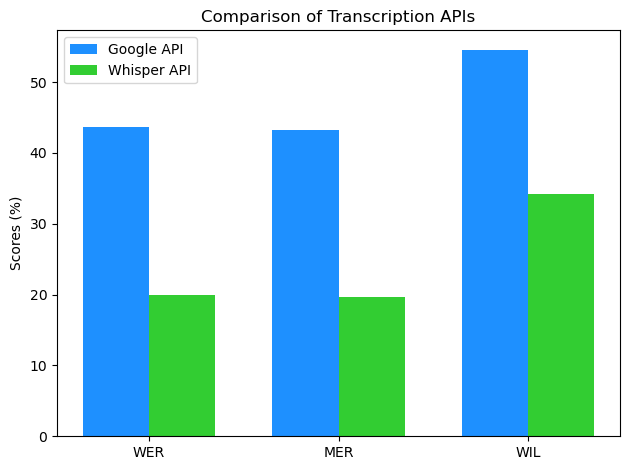

In [36]:
def compute_metrics(reference, hypothesis):
    return jiwer.compute_measures(reference, hypothesis)

# Calculate metrics
google_metrics = compute_metrics(reference_text, google_text)
whisper_metrics = compute_metrics(reference_text, whisper_text)

labels = ['WER', 'MER', 'WIL']
x = list(range(len(labels)))  
width = 0.35 

google_scores_percent = [score * 100 for score in google_scores]
whisper_scores_percent = [score * 100 for score in whisper_scores]

fig, ax = plt.subplots()
rects1 = ax.bar([xi - width/2 for xi in x], google_scores_percent, width, label='Google API', color = 'dodgerblue')
rects2 = ax.bar([xi + width/2 for xi in x], whisper_scores_percent, width, label='Whisper API', color = 'limegreen')

ax.set_ylabel('Scores (%)')
ax.set_title('Comparison of Transcription APIs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()
